In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Loading Dataset

In [2]:
delivery = pd.read_csv("/content/delivery_time.csv")
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#EDA

In [3]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


interpretions: NO missing values and column datatypes are also matching.
we can rename column names. 

In [4]:
delivery = delivery.rename(columns={"Delivery Time":"DeliveryTime","Sorting Time":"SortingTime"})
delivery.describe().T

,count,mean,std,min,25%,50%,75%,max
DeliveryTime,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
SortingTime,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


#checking for duplicated values

In [5]:
delivery[delivery.duplicated()].shape

(0, 2)

In [6]:
delivery[delivery.duplicated()]

,DeliveryTime,SortingTime


no duplicated values found. 

<ipython-input-7-b66ef67e0724>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery['SortingTime'])


<Axes: xlabel='SortingTime', ylabel='Density'>

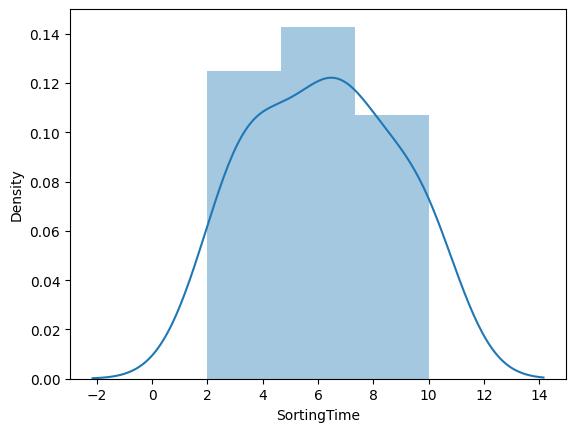

In [7]:
sns.distplot(delivery['SortingTime'])

nearly normally distributed 

<ipython-input-8-f8a8dbbdf6b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(delivery['DeliveryTime'])


<Axes: xlabel='DeliveryTime', ylabel='Density'>

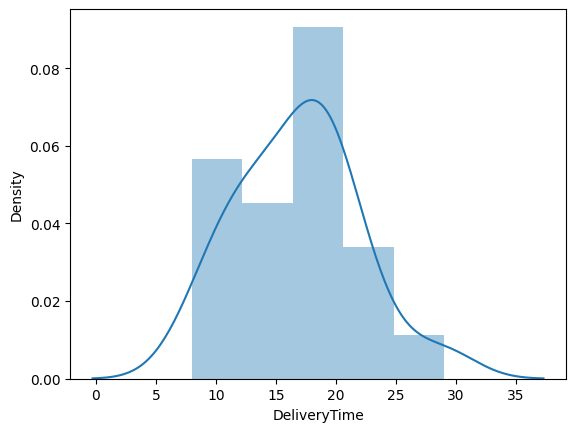

In [8]:
sns.distplot(delivery['DeliveryTime'])

little right skewed but nearly normally distributed data

#finding Outliers

<Axes: >

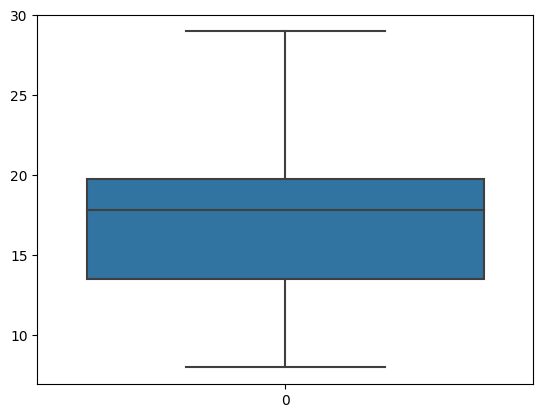

In [9]:
sns.boxplot(delivery['DeliveryTime'])

<Axes: >

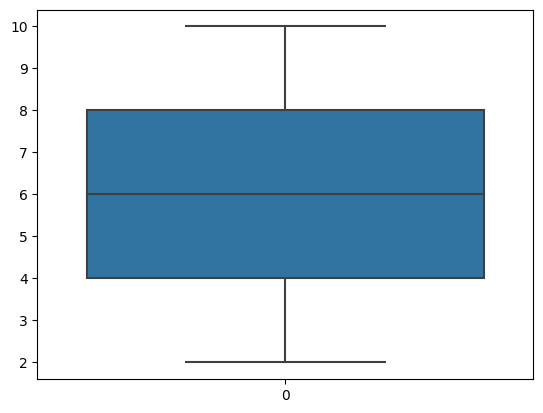

In [10]:
sns.boxplot(delivery['SortingTime'])

observed no outilers then no need handle(capping/deleting)

#finding correlation between independent and dependent variables

In [11]:
delivery.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


observerd strong correlation between sortingTime and DeliveryTime

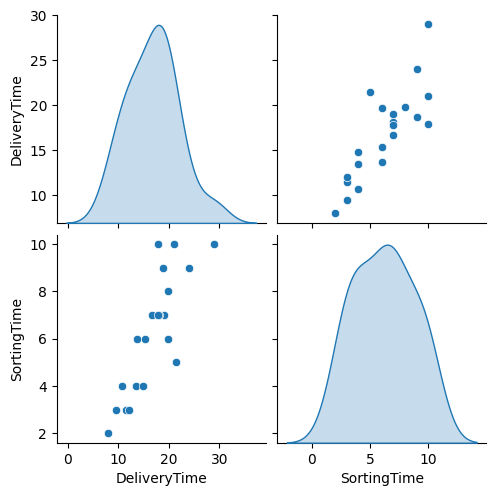

In [12]:
sns.pairplot(delivery,diag_kind='kde')

both sortingtime and deliverytime are linearly assosciated.

# Model Building

In [13]:
model = sm.ols("DeliveryTime~SortingTime",data = delivery).fit()
print(model.params)
print("****************")
print(model.rsquared,model.rsquared_adj)
print("*******************")
print(model.tvalues,'\n',model.pvalues)

Intercept      6.582734
SortingTime    1.649020
dtype: float64
****************
0.6822714748417231 0.6655489208860244
*******************
Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


observerd r squared value is 0.68, let's see after data transformation r saquaed value wil increase or not.

In [14]:
#square root transformation on data
model1 = sm.ols("DeliveryTime~np.sqrt(SortingTime)",data = delivery).fit()
print(model1.params)
print("****************")
print(model1.rsquared,model1.rsquared_adj)
print("*******************")
print(model1.tvalues,'\n',model1.pvalues)

Intercept              -2.518837
np.sqrt(SortingTime)    7.936591
dtype: float64
****************
0.695806227630867 0.6797960290851232
*******************
Intercept              -0.840911
np.sqrt(SortingTime)    6.592434
dtype: float64 
 Intercept               0.410857
np.sqrt(SortingTime)    0.000003
dtype: float64


observations for square root transformations: accuracy value is incereased.

In [15]:
#cube root transformation on data
model2 = sm.ols("DeliveryTime~np.cbrt(SortingTime)",data = delivery).fit()
print(model2.params)
print("****************")
print(model2.rsquared,model2.rsquared_adj)
print("*******************")
print(model2.tvalues,'\n',model2.pvalues)

Intercept              -11.579201
np.cbrt(SortingTime)    15.767284
dtype: float64
****************
0.6974182292354245 0.6814928728793943
*******************
Intercept              -2.672712
np.cbrt(SortingTime)    6.617624
dtype: float64 
 Intercept               0.015048
np.cbrt(SortingTime)    0.000002
dtype: float64


In [16]:
#log transformation on data
model3 = sm.ols("DeliveryTime~np.log(SortingTime)",data = delivery).fit()
print(model3.params)
print("****************")
print(model3.rsquared,model3.rsquared_adj)
print("*******************")
print(model3.tvalues,'\n',model3.pvalues)

Intercept              1.159684
np.log(SortingTime)    9.043413
dtype: float64
****************
0.6954434611324223 0.6794141696130761
*******************
Intercept              0.472460
np.log(SortingTime)    6.586789
dtype: float64 
 Intercept              0.641980
np.log(SortingTime)    0.000003
dtype: float64


#By comparing all models we can conculde model2(cbrt) giving high accuracy(r squared and adjusted r square values)

#model validation with respect to RMSE

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
#RMSE for model without transformation data
model_pred = model.predict(delivery[['SortingTime']])
model_rmse = np.sqrt(mean_squared_error(delivery[['DeliveryTime']], model_pred))
model_rmse

2.7916503270617654

In [19]:
#RMSE for model1 sqrt transformation data
model1_pred = model1.predict(np.sqrt(delivery[['SortingTime']]))
model1_rmse = np.sqrt(mean_squared_error(delivery[['DeliveryTime']], model1_pred))
model1_rmse

8.012362929607713

In [20]:
#RMSE for model2 cbrt transformation data
model2_pred = model2.predict(np.cbrt(delivery[['SortingTime']]))
model2_rmse = np.sqrt(mean_squared_error(delivery[['DeliveryTime']], model2_pred))
model2_rmse

10.144407377352064

In [22]:
#RMSE for model3 log transformation data
model3_pred = model3.predict(np.log(delivery[['SortingTime']]))
model3_rmse = np.sqrt(mean_squared_error(delivery[['DeliveryTime']], model3_pred))
model3_rmse

11.501421832587518

if we are more concerned with the accuracy of the model's predictions, then we should select the model with the lower RMSE, even if its R-squared value is slightly lower 

if we are more concerned with how well the model explains the variation in the data, then we should select the model with the higher R-squared value, even if its RMSE is slightly higher.

In [23]:
# selecting model for higher accuracy which is without any data transformation.
#predicting values from model
predicted = pd.DataFrame()
predicted['SortingTime'] = delivery.SortingTime
predicted['DeliveryTime'] = delivery.DeliveryTime
predicted['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted.SortingTime))
predicted

,SortingTime,DeliveryTime,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
